In [289]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from scipy import ndimage

## Exercise 6.1

In [350]:
def gaussian1DKernel(sigma, length = 4):
    h = np.ceil(length*sigma)
    x = np.arange(-h,h+1)
    
    g = (1/(np.sqrt(2*np.pi*(sigma**2))))*np.exp(-x**2/(2*sigma**2))
    g /=g.sum()   
    gx = -x*g/(sigma**2)

    g = g.reshape(-1, 1)
    gx = gx.reshape(-1, 1)
    return g,gx

In [290]:
im = cv2.imread("week06_data/TestIm1.png")[:,:,::-1]

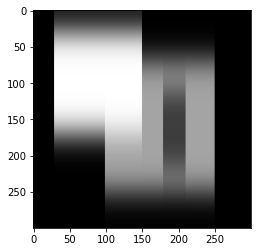

In [35]:
g, gx = gaussian1DKernel(20)
im_gauss = cv2.filter2D(im,-1, g)
plt.imshow(im_gauss)

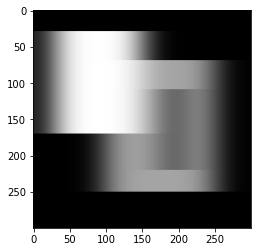

In [36]:
g, gx = gaussian1DKernel(20)
im_gauss = cv2.filter2D(im,-1, g.T)
plt.imshow(im_gauss)

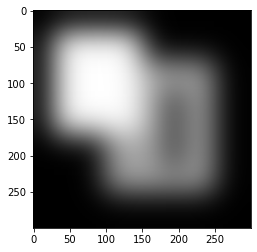

In [39]:
g, gx = gaussian1DKernel(20)
im_gauss = cv2.filter2D(im,-1, g)
im_gauss = cv2.filter2D(im_gauss,-1, g.T)
plt.imshow(im_gauss)

In [351]:
def gaussianSmoothing(im,sigma):
    g,gx = gaussian1DKernel(sigma)
    
    I1d = cv2.filter2D(im,-1,g)
    I = cv2.filter2D(I1d,-1,g.T)
    
    Ix1d = cv2.filter2D(im,-1,gx.T)
    Ix = cv2.filter2D(Ix1d,-1,g)
    
    Iy1d = cv2.filter2D(im,-1,gx)
    Iy = cv2.filter2D(Iy1d,-1,g.T)
    
    return I, Ix, Iy

In [352]:
im = cv2.imread("week06_data/TestIm1.png")[:,:,::-1]
im = im.astype('double')
I,Ix,Iy = gaussianSmoothing(im,1)


In [353]:
Ix.shape

(300, 300, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


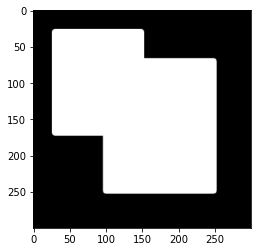

In [354]:
plt.imshow(I)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


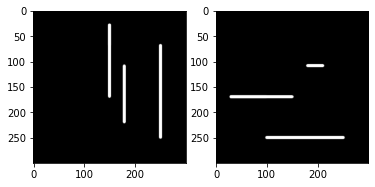

In [355]:
plt.subplot(1,2,1)
plt.imshow(Ix)
plt.subplot(1,2,2)
plt.imshow(Iy)
##Why?

## Exercise 6.3

In [24]:
def smoothedHessian(im, sigma, epsilon):
    _,Ix,Iy = gaussianSmoothing(im,sigma)
    ge,_ = gaussian1DKernel(sigma=sigma, length=epsilon)
    
    Cxx_1d = cv2.filter2D(Ix**2,-1,ge)
    Cxx = cv2.filter2D(Cxx_1d,-1,ge.T)
    
    Cxy_1d = cv2.filter2D(Ix*Iy,-1,ge)
    Cxy = cv2.filter2D(Cxy_1d,-1,ge.T)
    
    Cyy_1d = cv2.filter2D(Iy*Iy,-1,ge)
    Cyy = cv2.filter2D(Cyy_1d,-1,ge.T)
    
    C = np.array([[Cxx,Cxy],[Cxy,Cyy]])
    
    return C, Cxx, Cxy, Cyy

In [25]:
C,_,_,_ = smoothedHessian(im, 20,40)

In [26]:
C.shape
## How to use the smoothed Hessian function on the test image?
## How to choose sigma and epsilon value?

(2, 2, 300, 300, 3)

## Exercise 6.4

In [356]:
def gaussian1DKernel(sigma, length = 4):
    h = np.ceil(length*sigma)
    x = np.arange(-h,h+1)
    
    g = (1/(np.sqrt(2*np.pi*(sigma**2))))*np.exp(-x**2/(2*sigma**2))
    g /=g.sum()
    gx = -x*g/(sigma**2)

    g = g.reshape(-1, 1)
    gx = gx.reshape(-1, 1)
    
    return g,gx

In [270]:
'''
def gaussianSmoothing(im,sigma):
    g,gx = gaussian1DKernel(sigma)
    
    I1d = cv2.filter2D(im,-1,g)
    I = cv2.filter2D(I1d,-1,g.T)
    sx = ndimage.sobel(im,axis=0,mode='constant')
    Ix = cv2.filter2D(sx,-1,g)
    sy = ndimage.sobel(im,axis=1,mode='constant')
    Iy = cv2.filter2D(sy,-1,g.T)
    
    return I, Ix, Iy
'''

"\ndef gaussianSmoothing(im,sigma):\n    g,gx = gaussian1DKernel(sigma)\n    \n    I1d = cv2.filter2D(im,-1,g)\n    I = cv2.filter2D(I1d,-1,g.T)\n    sx = ndimage.sobel(im,axis=0,mode='constant')\n    Ix = cv2.filter2D(sx,-1,g)\n    sy = ndimage.sobel(im,axis=1,mode='constant')\n    Iy = cv2.filter2D(sy,-1,g.T)\n    \n    return I, Ix, Iy\n"

In [357]:

def gaussianSmoothing(im,sigma):
    g,gx = gaussian1DKernel(sigma)
    
    I1d = cv2.filter2D(im,-1,g)
    I = cv2.filter2D(I1d,-1,g.T)
    
  
    Ix1d = cv2.filter2D(im,-1,gx.T)
    Ix = cv2.filter2D(Ix1d,-1,g)
    
    Iy1d = cv2.filter2D(im,-1,gx)
    Iy = cv2.filter2D(Iy1d,-1,g.T)
 
    return I, Ix, Iy


In [358]:
def smoothedHessian(im, sigma, epsilon):
    _,Ix,Iy = gaussianSmoothing(im,sigma)
    ge,_ = gaussian1DKernel(sigma=epsilon)
    
    Cxx_1d = cv2.filter2D(Ix**2,-1,ge)
    Cxx = cv2.filter2D(Cxx_1d,-1,ge.T)
    
    Cxy_1d = cv2.filter2D(Ix*Iy,-1,ge)
    Cxy = cv2.filter2D(Cxy_1d,-1,ge.T)
    
    Cyy_1d = cv2.filter2D(Iy*Iy,-1,ge)
    Cyy = cv2.filter2D(Cyy_1d,-1,ge.T)
    
    C = np.array([[Cxx,Cxy],[Cxy,Cyy]])
    
    return C, Cxx, Cxy, Cyy

In [359]:
im = cv2.imread("week06_data/TestIm1.png")[:,:,::-1]
im = im.astype('float32')
#im = cv2.imread("week06_data/TestIm1.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [360]:
def harrisMeasure(im, sigma, epsilon, k):
    _,Cxx,Cxy, Cyy = smoothedHessian(im, sigma,epsilon)
    r = Cxx*Cyy - Cxy*Cxy -k*(Cxx+Cyy)**2
    
    return r

In [361]:
sigma = 1
epsilon = 2
k = 0.06
r = harrisMeasure(im, sigma, epsilon, k)

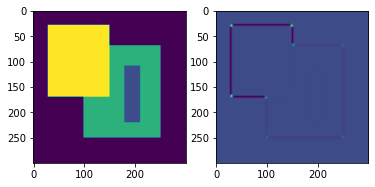

In [362]:
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(r)

## Exercise 6.5

In [472]:
def cornerDetector(im, sigma, epsilon, k, tau):
    r = harrisMeasure(im, sigma, epsilon, k)
    r = r.astype('uint8')
    '''
    lower_r = np.where(r<tau*r.max())
    lower_r = np.where(r<tau)
    r[lower_r[0][:],lower_r[1][:]]=0
    higher = np.where(r>0)
    '''
    for i in range(1,298):
        for j in range(1,298):
            if r[i,j]> tau and r[i,j]>r[i+1,j] and r[i,j]>r[i,j+1] and r[i,j]>r[i-1,j] and r[i,j]>r[i,j-1]:
                r[i+1,j]=0
                r[i,j+1]=0
                r[i-1,j]=0
                r[i,j-1]=0
    '''
    c = np.zeros([300,300])
    for i in range(1,298):
        for j in range(1,298):
            if r[i,j]>tau and r[i,j]>r[i+1,j] and r[i,j]>r[i,j+1] and r[i,j]>r[i-1,j] and r[i,j]>r[i,j-1]:
                c[i,j]=1
    corner = np.where(c==1)
    '''
    corner = np.where(r>0)
    return corner

In [473]:
im = cv2.imread("week06_data/TestIm1.png")
im = im.astype('float32')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
sigma = 0.5
epsilon = 1
k = 0.06
tau =240
corner = cornerDetector(im, sigma, epsilon, k, tau)

In [474]:
len(corner[0])

10214

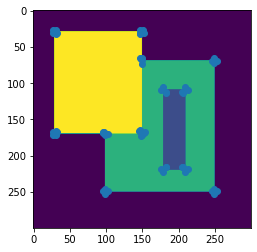

In [471]:
plt.imshow(im)
plt.scatter(corner[1],corner[0]) ###why 1,0 not 0,1    when we read the point, the coordinate is [row, col], 
                                                    #when we draw picture, the coordinate is [x,y]=[col,row]
#plt.scatter(10,200)

In [379]:
tau = 0.8
lower_r = np.where(r<tau*r.max())

In [380]:
len(lower_r[0])

89991

In [381]:
r[lower_r[0][:],lower_r[1][:]]=0

In [382]:
higher = np.where(r>0)

In [383]:
len(higher[0])

9